#### About

> Transformers

Transformer is a neural network architecture that has been widely used in various natural language processing (NLP) tasks such as machine translation, text classification, and language generation. They are based on a self-awareness mechanism that allows models to consider different parts of the input sequence with different degrees of attention, making them very efficient at capturing long-range dependencies in sequence data. The main idea behind Transformers is a self-awareness mechanism that allows the model to weigh the meaning of different words in the input sequence when making predictions. The self-attention mechanism calculates an attention score for each word in the input sequence based on the ratio of all pairs of words in the sequence. These attention scores are then used to compute weighted representations of the input sequences, which are used as input to subsequent layers of the network.

Let's take the example of the string "I love this movie, it's great!" and use this example to understand the flow of the Transformer model for text classification.

1. Input Embeds: The input text sequence "I love this movie, it's great!" is first transformed into a sequence of word embeddings. Assume that the word embedding for each word in the sequence is [x_1, x_2, ..., x_n], where x_i is the embedding vector of the ith word. 

2. Vectors of queries, keys and values: The transformer model uses three sets of learnable weight matrices to compute the query, key, and value vectors for each word in the input sequence. These vectors are represented as Q = [q_1, q_2, ..., q_n], K = [k_1, k_2, ..., k_n] and V = [v_1, v_2, ..., v_n]. Suppose these vectors are for the input sequence "I love this movie, it's great!". 

3. Attention Score: The attention score for each word in the input sequence is calculated as the score product between the query and key vectors. The dot product between the i-th query vector (q_i) and the j-th key vector (k_j) is expressed as a_ij = q_i * k_j. These attention scores reflect the similarity or relatedness of different words in the input sequence. 

4. Softmax and Weighted Representation: Attention scores are normalized using a softmax function that transforms them into a probability distribution over all words in the input sequence. Apply the softmax function to the rows of the matrix of attention indicators, obtaining a new matrix of the same size. This matrix is ​​then used to compute a weighted representation of the input sequence, where each word is weighted by an attention score. Let's assume a weighted representation of the input sequence "I loved this movie, it was great!". Expressed as Y = [y_1, y_2, ..., y_n].

5. Multi-Head Attention: To capture different input sequence patterns, the self-attn mechanism is typically invoked multiple times in parallel using different sets of query, key, and value vectors. These parallel mechanisms of self-attention are called "heads". The output of each head is concatenated along the last dimension to obtain a final weighted representation of the input sequence.

6. Position Transfer Networks: After obtaining the weighted representations of the input sequences, they are passed through position transfer networks, which are fully connected layers that are applied independently to each position of the sequence. These feedforward networks help the model capture local dependencies in the input sequence. 

7. Layer Normalization and Residual Connections: Layer normalization is applied after each self-mechanism and positional feed network to improve model stability and convergence. Additionally, residual connections are used to bypass each self-awareness mechanism and position the feed-forward networks, allowing the model to capture both local and global dependencies in the input sequence.

8. Output: The final output of the transformer model is usually obtained by subjecting the weighted representation of the input sequence to a linear projection followed by a softmax activation function that provides a probability distribution over different mood classes (positive or negative). The category with the highest probability is considered as the expected sentiment feature for the input text.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt


2023-04-22 04:19:32.253581: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 04:19:32.332073: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 04:19:32.333788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 04:19:33.915375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

# Load and preprocess the IMDb movie reviews dataset
max_features = 20000  # Number of most frequent words to keep
max_len = 200  # Maximum length of input sequence


In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)



In [4]:
# Define the Transformer model
def transformer_model(max_features, max_len):
    inputs = keras.Input(shape=(max_len,))
    embedding_layer = layers.Embedding(max_features, 256)(inputs)
    x = layers.Dropout(0.1)(embedding_layer)
    x = layers.Conv1D(256, 3, padding='valid', activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(2, activation='softmax')(x)
    return keras.Model(inputs, outputs)


In [5]:
# Create an instance of the Transformer model
model = transformer_model(max_features, max_len)


2023-04-22 04:19:48.211036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 04:19:48.211851: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [7]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_test, y_test))


Epoch 1/2
391/391 [==============================] - 120s 302ms/step - loss: 0.3564 - accuracy: 0.8367 - val_loss: 0.2887 - val_accuracy: 0.8763
Epoch 2/2
391/391 [==============================] - 121s 309ms/step - loss: 0.1668 - accuracy: 0.9390 - val_loss: 0.3687 - val_accuracy: 0.8514


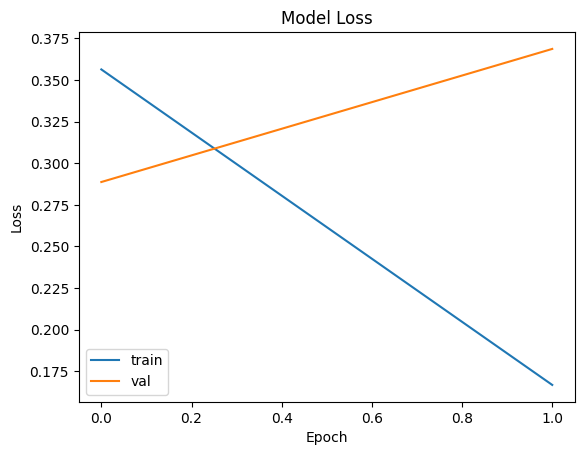

In [8]:
# Plot the training loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()


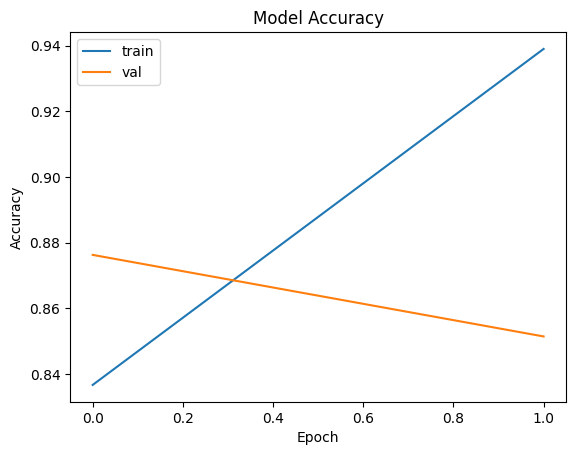

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()
